<h2>🚜 Bulldozer Price Prediction</h1>
<h3>Project Overview</h3>
This notebook presents a comprehensive machine learning solution for the Kaggle competition, Blue Book for Bulldozers. The primary objective is to develop a predictive model capable of estimating the auction sale price of bulldozers based on a rich dataset of historical sales records and equipment characteristics.

<br>

The project follows a rigorous, end-to-end data science pipeline:

1. <b>Data Exploration & Cleaning:</b> Initial analysis to understand the dataset's structure, identify missing values, and handle inconsistencies.

2. <b>Feature Engineering:</b> Feature Engineering is employed for data preparation, including handling categorical and numerical features.

3. <b>Model Training & Hyperparameter Tuning:</b> A variety of regression models are trained and optimized to find the best-performing algorithm for this task.

4. <b>Performance Evaluation & Model Selection:</b> The final models are evaluated using key regression metrics like MAE, MSE, and R² to determine the most accurate predictor.

Author
👤 [Brejesh Balakrishnan]

<a href="https://www.linkedin.com/in/brejesh-balakrishnan-7855051b9/">LinkedIn</a>

<a href="https://github.com/brej-29">GitHub</a>

Project Timeline
Created: August 24, 2025

<b>Importing<b/>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

<b>Data Exploration & Cleaning</b>

In [2]:
df = pd.read_csv("data/TrainAndValid.csv",low_memory=False)
#dtypes are exact since low_memory is set as false

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [4]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [5]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

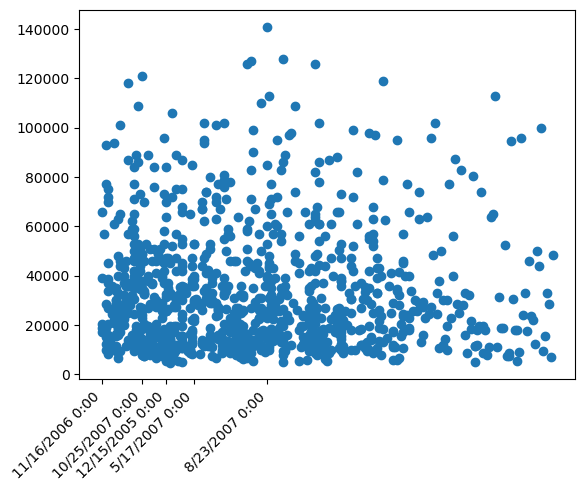

In [6]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000])
plt.xticks(rotation=45, ha='right')
n = 200 # Show every 50th label
ax.set_xticks(df["saledate"][:1000][::n])

The SalePrice values are widely scattered across the entire time frame, with high and low prices occurring throughout the year without any obvious recurring cycles or trends. This suggests that factors other than seasonality are the primary drivers of price fluctuations.

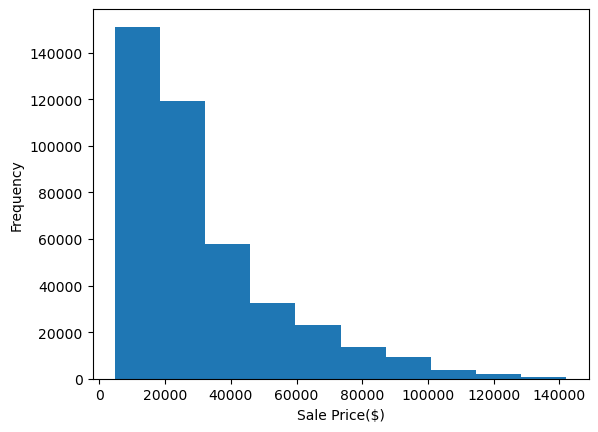

In [7]:
df.SalePrice.plot.hist(xlabel="Sale Price($)");

the distribution is highly skewed to the right (positively skewed). This indicates that most bulldozers sell for a lower price, and there are very few sales at the high end of the price spectrum. The long tail on the right suggests the presence of some outliers or high-value sales.

In [8]:
df = pd.read_csv("data/TrainAndValid.csv",low_memory=False, parse_dates=["saledate"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

low_memory=False and parse_dates=["saledate"] to handle a large dataset efficiently and correctly interpret a specific column as dates.
low_memory=False: This tells pandas to read the entire file into memory at once, rather than in chunks. This is necessary because some columns might have mixed data types, and reading the file in one go helps pandas infer the correct data type for each column, preventing potential warnings or errors.

parse_dates=["saledate"]: This argument tells pandas to automatically convert the values in the "saledate" column into a datetime object. This is a crucial step for any time-series analysis or feature engineering based on dates, as it allows for proper date-based sorting, filtering, and calculations.

In [9]:
df["saledate"][:10]

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
5   2008-12-18
6   2004-08-26
7   2005-11-17
8   2009-08-27
9   2007-08-09
Name: saledate, dtype: datetime64[ns]

Text(0, 0.5, 'Sale Price ($)')

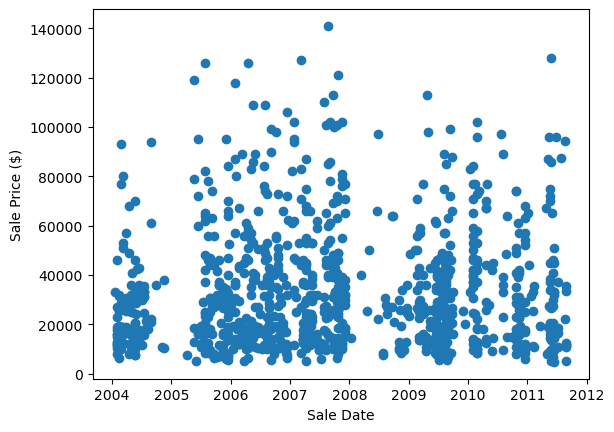

In [10]:
fig, ax = plt.subplots()
ax.scatter(x=df["saledate"][:1000], y=df["SalePrice"][:1000])
ax.set_xlabel("Sale Date")
ax.set_ylabel("Sale Price ($)")

While the prices fluctuate widely over the years, the plot does not show a clear upward or downward trend. The data points are scattered randomly, suggesting that other features, such as the machine's condition, usage, or model, are the primary drivers of its final price.

Though there are some points clustered together around the begenning of 2004 and the mid of 2009 we cannot draw any meaningful conclusions from this alone

In [11]:
df.sort_values(by=["saledate"], inplace=True, ascending=True)
df.saledate.head(10), df.saledate.tail(10)

(205615   1989-01-17
 274835   1989-01-31
 141296   1989-01-31
 212552   1989-01-31
 62755    1989-01-31
 54653    1989-01-31
 81383    1989-01-31
 204924   1989-01-31
 135376   1989-01-31
 113390   1989-01-31
 Name: saledate, dtype: datetime64[ns],
 409202   2012-04-28
 408976   2012-04-28
 411695   2012-04-28
 411319   2012-04-28
 408889   2012-04-28
 410879   2012-04-28
 412476   2012-04-28
 411927   2012-04-28
 407124   2012-04-28
 409203   2012-04-28
 Name: saledate, dtype: datetime64[ns])

<b>Feature Engineering</b>

In [12]:
df_tmp = df.copy()

In [13]:
df_tmp["saleYear"] = df_tmp.saledate.dt.year
df_tmp["saleMonth"] = df_tmp.saledate.dt.month
df_tmp["saleDay"] = df_tmp.saledate.dt.day
df_tmp["saleDayofWeek"] = df_tmp.saledate.dt.dayofweek
df_tmp["saleDayofYear"] = df_tmp.saledate.dt.dayofyear

df_tmp.drop("saledate",axis=1, inplace=True)

In [14]:
df_tmp[["SalePrice", "saleYear", "saleMonth", "saleDay", "saleDayofWeek", "saleDayofYear"]].head()

,SalePrice,saleYear,saleMonth,saleDay,saleDayofWeek,saleDayofYear
205615,9500.0,1989,1,17,1,17
274835,14000.0,1989,1,31,1,31
141296,50000.0,1989,1,31,1,31
212552,16000.0,1989,1,31,1,31
62755,22000.0,1989,1,31,1,31


Text(0, 0.5, 'Sale Price ($)')

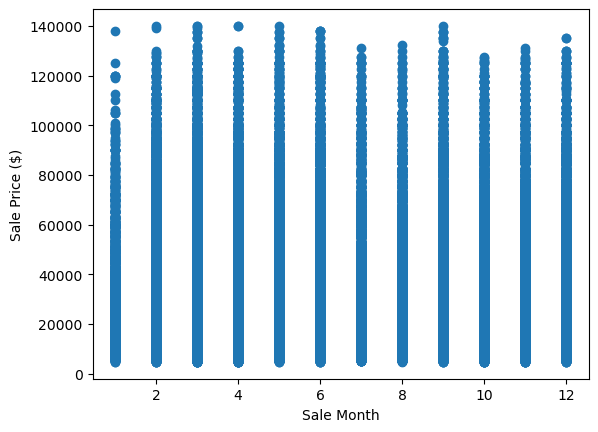

In [15]:
fig, ax = plt.subplots()
ax.scatter(x=df_tmp["saleMonth"][:100000], y=df_tmp["SalePrice"][:100000])
ax.set_xlabel("Sale Month")
ax.set_ylabel("Sale Price ($)")

Based on the plot of SalePrice by SaleMonth, there is no clear seasonal pattern in the bulldozer sales. The prices are widely distributed across every month of the year, showing no consistent increase or decrease during a particular season. This suggests that the month of the sale is not a significant factor in determining the price.

Text(0, 0.5, 'Median Sale Price ($)')

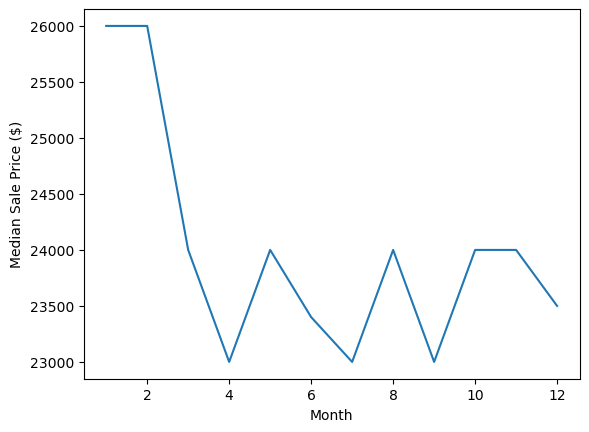

In [16]:
df_tmp.groupby(["saleMonth"])["SalePrice"].median().plot()
plt.xlabel("Month")
plt.ylabel("Median Sale Price ($)")

Based on the line plot showing the median sale price per month, there appears to be a seasonal pattern in the data. The median price is highest at the beginning of the year (January-February) and tends to drop sharply in the spring (March-April). There are some minor fluctuations throughout the rest of the year, but the initial high and subsequent drop suggest a consistent, recurring trend.

In [17]:
df_tmp.state.value_counts()[:10]

state
Florida        67320
Texas          53110
California     29761
Washington     16222
Georgia        14633
Maryland       13322
Mississippi    13240
Ohio           12369
Illinois       11540
Colorado       11529
Name: count, dtype: int64

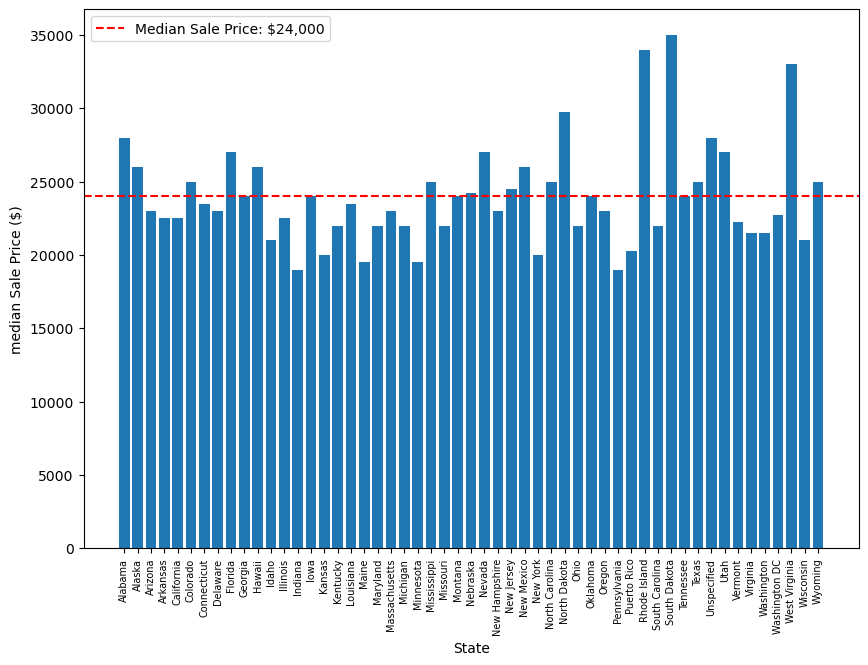

In [18]:
median_prices_by_state = df_tmp.groupby(["state"])["SalePrice"].median()
median_sale_price = df_tmp["SalePrice"].median()

plt.figure(figsize=(10,7))
plt.bar(x=median_prices_by_state.index, height=median_prices_by_state.values)
plt.xlabel("State")
plt.ylabel("median Sale Price ($)")
plt.xticks(rotation=90, fontsize=7)
plt.axhline(y=median_sale_price, color="red", linestyle="--", label=f"Median Sale Price: ${median_sale_price:,.0f}")
plt.legend()

Based on the bar plot, the median sale price for bulldozers varies significantly across different states. While the national median is approximately $24,000 (as shown by the dashed red line), states like South Carolina, Tennessee, and Washington have median prices well above this average. In contrast, states such as Nevada, Mississippi, and Michigan have median prices that are noticeably lower than the national median. This indicates that location is a strong factor influencing the final sale price of a bulldozer.

Models do not like missing or string values so both needs to be fixed before going into selecting the models

In [19]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-null   o

In [20]:
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

In [21]:
df_tmp.dtypes

SalesID                       int64
SalePrice                   float64
MachineID                     int64
ModelID                       int64
datasource                    int64
auctioneerID                float64
YearMade                      int64
MachineHoursCurrentMeter    float64
UsageBand                    object
fiModelDesc                  object
fiBaseModel                  object
fiSecondaryDesc              object
fiModelSeries                object
fiModelDescriptor            object
ProductSize                  object
fiProductClassDesc           object
state                        object
ProductGroup                 object
ProductGroupDesc             object
Drive_System                 object
Enclosure                    object
Forks                        object
Pad_Type                     object
Ride_Control                 object
Stick                        object
Transmission                 object
Turbocharged                 object
Blade_Extension             

In [22]:
for label, content in df_tmp.items():
    if pd.api.types.is_object_dtype(content):
        df_tmp[label]=df_tmp[label].astype("category")

In [23]:
df_tmp.dtypes

SalesID                        int64
SalePrice                    float64
MachineID                      int64
ModelID                        int64
datasource                     int64
auctioneerID                 float64
YearMade                       int64
MachineHoursCurrentMeter     float64
UsageBand                   category
fiModelDesc                 category
fiBaseModel                 category
fiSecondaryDesc             category
fiModelSeries               category
fiModelDescriptor           category
ProductSize                 category
fiProductClassDesc          category
state                       category
ProductGroup                category
ProductGroupDesc            category
Drive_System                category
Enclosure                   category
Forks                       category
Pad_Type                    category
Ride_Control                category
Stick                       category
Transmission                category
Turbocharged                category
B

In [24]:
df_tmp.state.dtype

CategoricalDtype(categories=['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
                  'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
                  'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
                  'Kentucky', 'Louisiana', 'Maine', 'Maryland',
                  'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
                  'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
                  'New Jersey', 'New Mexico', 'New York', 'North Carolina',
                  'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
                  'Puerto Rico', 'Rhode Island', 'South Carolina',
                  'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah',
                  'Vermont', 'Virginia', 'Washington', 'Washington DC',
                  'West Virginia', 'Wisconsin', 'Wyoming'],
, ordered=False, categories_dtype=object)

In [25]:
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [26]:
df_tmp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [27]:
target_state_cat_number=43
target_state_cat_value = df_tmp.state.cat.categories[target_state_cat_number]
print(f"Target state category number {target_state_cat_number} maps to : {target_state_cat_value}")

Target state category number 43 maps to : Texas


To save the csv, the following does not preserve the categorical data in the columns

df_tmp.to_csv("./data/TrainAndValid_object_values_as_categories.csv",index=False)

so instead use the following to save the categorical data also. parquet uses pyarrow to do the same

In [28]:
df_tmp.to_parquet(path="./data/TrainAndValid_object_values_as_categories.parquet",engine="auto")

In [29]:
df_tmp = pd.read_parquet(path="./data/TrainAndValid_object_values_as_categories.parquet",engine="auto")

In [30]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [31]:
df_tmp.isna().sum().sort_values(ascending=False)[:20]

Blade_Width          386715
Engine_Horsepower    386715
Tip_Control          386715
Pushblock            386715
Blade_Extension      386715
Enclosure_Type       386715
Scarifier            386704
Hydraulics_Flow      367823
Grouser_Tracks       367823
Coupler_System       367724
fiModelSeries        354031
Steering_Controls    341176
Differential_Type    341134
UsageBand            339028
fiModelDescriptor    337882
Backhoe_Mounting     331986
Stick                331602
Turbocharged         331602
Pad_Type             331602
Blade_Type           330823
dtype: int64

In [32]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        column_datatype = df_tmp[label].dtype.name
        example_value = content.sample(1).values
        example_value_dtype = pd.api.types.infer_dtype(example_value)
        print(f"Column name: {label} | column dtype: {column_datatype} | Example value: {example_value} | Example Value dtype: {example_value_dtype}")

Column name: SalesID | column dtype: int64 | Example value: [2349416] | Example Value dtype: integer
Column name: SalePrice | column dtype: float64 | Example value: [18000.] | Example Value dtype: floating
Column name: MachineID | column dtype: int64 | Example value: [1039878] | Example Value dtype: integer
Column name: ModelID | column dtype: int64 | Example value: [3135] | Example Value dtype: integer
Column name: datasource | column dtype: int64 | Example value: [136] | Example Value dtype: integer
Column name: auctioneerID | column dtype: float64 | Example value: [4.] | Example Value dtype: floating
Column name: YearMade | column dtype: int64 | Example value: [1000] | Example Value dtype: integer
Column name: MachineHoursCurrentMeter | column dtype: float64 | Example value: [0.] | Example Value dtype: floating
Column name: saleYear | column dtype: int32 | Example value: [2009] | Example Value dtype: integer
Column name: saleMonth | column dtype: int32 | Example value: [10] | Exampl

This code snippet iterates through each column of a DataFrame and prints its name, data type, an example value, and the inferred data type of that example value.
This process helps with identifying columns with correct numeric types and those that may need cleaning or conversion for machine learning models like in the following snippet where it is used to identify if a given numerical column has null/NanN values

In [33]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(f"Column name: {label} | Has missing values: {True}")
        else:
            print(f"Column name: {label} | Has missing values: {False}")

Column name: SalesID | Has missing values: False
Column name: SalePrice | Has missing values: False
Column name: MachineID | Has missing values: False
Column name: ModelID | Has missing values: False
Column name: datasource | Has missing values: False
Column name: auctioneerID | Has missing values: True
Column name: YearMade | Has missing values: False
Column name: MachineHoursCurrentMeter | Has missing values: True
Column name: saleYear | Has missing values: False
Column name: saleMonth | Has missing values: False
Column name: saleDay | Has missing values: False
Column name: saleDayofWeek | Has missing values: False
Column name: saleDayofYear | Has missing values: False


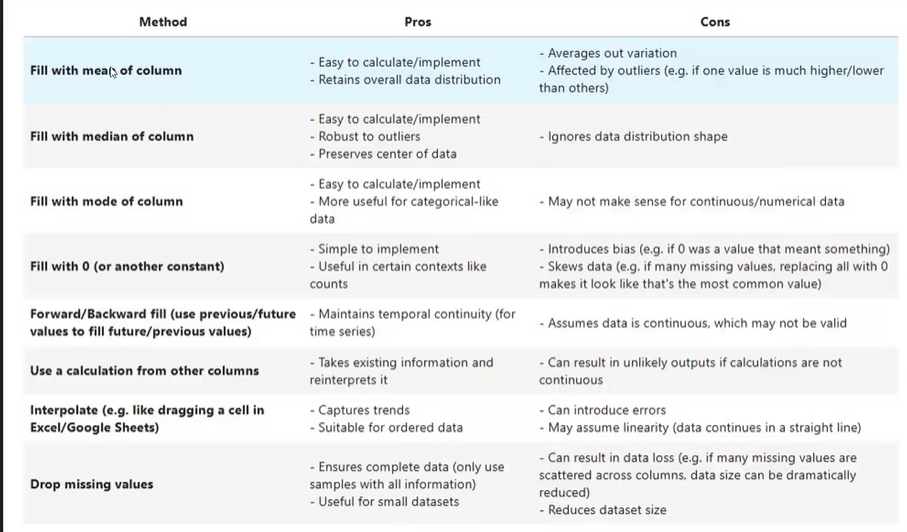

In [34]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df_tmp[label+"_is_missing"]=pd.isnull(content).astype(int)
            df_tmp[label] = content.fillna(content.median())

This code is designed to handle missing numerical data. It loops through each column in the DataFrame df_tmp. If a column is a numeric type and contains any missing values, the code performs two key actions:

1. Creates a new binary column: It adds a new column with the suffix _is_missing (e.g., Age_is_missing). This column is a flag, with a 1 where the original data was missing and a 0 where it was not. This technique is useful for informing a machine learning model about which data points were originally missing.

2. Fills missing values: It fills the missing values in the original column with the median of that column. The median is used to avoid skewing the data, which can happen if the mean is used on a dataset with outliers. This ensures that the dataset is complete and ready for use in a machine learning model

In [35]:
df_tmp[df_tmp["MachineHoursCurrentMeter_is_missing"] == 1].sample(5)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayofWeek,saleDayofYear,auctioneerID_is_missing,MachineHoursCurrentMeter_is_missing
50291,1292954,39500.0,1164068,3238,132,5.0,1999,0.0,NaN,850G,...,None or Unspecified,NaN,NaN,2005,3,29,1,88,0,1
143272,1510204,40500.0,693867,3778,132,16.0,1988,0.0,NaN,926E,...,NaN,Standard,Conventional,1994,7,14,3,195,0,1
55350,1305200,21000.0,1487913,3356,132,1.0,1971,0.0,NaN,12F,...,NaN,NaN,NaN,1994,3,17,3,76,0,1
90139,1397862,47500.0,259277,1597,132,9.0,1997,0.0,NaN,D5MXL,...,Finger Tip,NaN,NaN,2004,5,20,3,141,0,1
117007,1455042,18000.0,1371885,4147,132,6.0,1975,0.0,NaN,D8K,...,None or Unspecified,NaN,NaN,1999,4,20,1,110,0,1


In [36]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(f"Column name: {label} | Has missing values: {True}")
        else:
            print(f"Column name: {label} | Has missing values: {False}")

Column name: SalesID | Has missing values: False
Column name: SalePrice | Has missing values: False
Column name: MachineID | Has missing values: False
Column name: ModelID | Has missing values: False
Column name: datasource | Has missing values: False
Column name: auctioneerID | Has missing values: False
Column name: YearMade | Has missing values: False
Column name: MachineHoursCurrentMeter | Has missing values: False
Column name: saleYear | Has missing values: False
Column name: saleMonth | Has missing values: False
Column name: saleDay | Has missing values: False
Column name: saleDayofWeek | Has missing values: False
Column name: saleDayofYear | Has missing values: False
Column name: auctioneerID_is_missing | Has missing values: False
Column name: MachineHoursCurrentMeter_is_missing | Has missing values: False


In [37]:
df_tmp.auctioneerID_is_missing.value_counts()

auctioneerID_is_missing
0    392562
1     20136
Name: count, dtype: int64

In [38]:
print(f"Columns which are not numeric:")
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(f"Column name: {label} | column dtype: {df_tmp[label].dtype.name}")

Columns which are not numeric:
Column name: UsageBand | column dtype: category
Column name: fiModelDesc | column dtype: category
Column name: fiBaseModel | column dtype: category
Column name: fiSecondaryDesc | column dtype: category
Column name: fiModelSeries | column dtype: category
Column name: fiModelDescriptor | column dtype: category
Column name: ProductSize | column dtype: category
Column name: fiProductClassDesc | column dtype: category
Column name: state | column dtype: category
Column name: ProductGroup | column dtype: category
Column name: ProductGroupDesc | column dtype: category
Column name: Drive_System | column dtype: category
Column name: Enclosure | column dtype: category
Column name: Forks | column dtype: category
Column name: Pad_Type | column dtype: category
Column name: Ride_Control | column dtype: category
Column name: Stick | column dtype: category
Column name: Transmission | column dtype: category
Column name: Turbocharged | column dtype: category
Column name: Bl

In [39]:
column_to_category_dict = {}
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_tmp[label+"_is_missing"] = pd.isnull(content).astype(int)
        content_categories = pd.Categorical(content)
        content_category_codes = content_categories.codes + 1 

        column_to_category_dict[label] = dict(zip(content_category_codes, content_categories))
        df_tmp[label] = content_category_codes

This code prepares a DataFrame for machine learning by handling non-numeric data. It performs the following steps for each non-numeric column:

1. Missing Value Flagging: A new binary column is created with the suffix _is_missing to flag any missing values. This tells a model which data points were originally incomplete.

2. Categorical Encoding: The column's values are converted into a categorical type.

3. Numerical Transformation: The categorical values are then encoded as integers (numeric codes), which a machine learning model can process.

4. Mapping Creation: A dictionary is created to store the mapping between the new integer codes and the original string labels, which is useful for later analysis and interpretation.

In [40]:
df_tmp.sample(5)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
280728,1876735,8000.0,1548384,10832,132,1.0,1999,0.0,0,242,...,1,1,1,1,1,1,1,1,1,1
230481,1723109,31000.0,1485125,16247,132,3.0,1997,0.0,0,4349,...,0,0,0,0,0,1,1,1,1,1
161990,1583399,42000.0,1074517,7944,132,1.0,1997,0.0,0,62,...,0,0,0,0,0,1,1,1,1,1
271697,1811410,13500.0,1449093,17318,132,1.0,2004,0.0,0,4520,...,1,1,1,1,1,1,1,1,1,1
347797,2404358,17000.0,1211154,2231,136,1.0,1000,0.0,0,3801,...,0,0,0,0,0,1,1,1,1,1


In [41]:
for key, value in sorted(column_to_category_dict["UsageBand"].items()):
    print(f"{key} -> {value}")

0 -> nan
1 -> High
2 -> Low
3 -> Medium


In [42]:
for key, value in sorted(column_to_category_dict["state"].items()):
    print(f"{key} -> {value}")

1 -> Alabama
2 -> Alaska
3 -> Arizona
4 -> Arkansas
5 -> California
6 -> Colorado
7 -> Connecticut
8 -> Delaware
9 -> Florida
10 -> Georgia
11 -> Hawaii
12 -> Idaho
13 -> Illinois
14 -> Indiana
15 -> Iowa
16 -> Kansas
17 -> Kentucky
18 -> Louisiana
19 -> Maine
20 -> Maryland
21 -> Massachusetts
22 -> Michigan
23 -> Minnesota
24 -> Mississippi
25 -> Missouri
26 -> Montana
27 -> Nebraska
28 -> Nevada
29 -> New Hampshire
30 -> New Jersey
31 -> New Mexico
32 -> New York
33 -> North Carolina
34 -> North Dakota
35 -> Ohio
36 -> Oklahoma
37 -> Oregon
38 -> Pennsylvania
39 -> Puerto Rico
40 -> Rhode Island
41 -> South Carolina
42 -> South Dakota
43 -> Tennessee
44 -> Texas
45 -> Unspecified
46 -> Utah
47 -> Vermont
48 -> Virginia
49 -> Washington
50 -> Washington DC
51 -> West Virginia
52 -> Wisconsin
53 -> Wyoming


In [43]:
total_missing_values = df_tmp.isna().sum().sum()

if total_missing_values == 0:
    print(f"Total missing values: {total_missing_values} - Finally no missing values, Let's build a model!")
else:
    print(f"uh ohh.. total missing values: {total_missing_values} - Let's recheck our steps to fill the values")

Total missing values: 0 - Finally no missing values, Let's build a model!


<b>Model Training</b>

In [44]:
%%time
from sklearn.ensemble import RandomForestRegressor

df_tmp_sample_1k = df_tmp.sample(n=1000, random_state=42)

model = RandomForestRegressor(n_jobs=-1)

X_sample_1k = df_tmp_sample_1k.drop("SalePrice",axis=1)
y_sample_1k = df_tmp_sample_1k["SalePrice"]

model.fit(X=X_sample_1k, y=y_sample_1k)

CPU times: total: 5.95 s
Wall time: 2.25 s


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [45]:
model_sample_1k_score = model.score(X=X_sample_1k, y=y_sample_1k)
print(f"Model score on {len(df_tmp)} samples: {model_sample_1k_score}")

Model score on 412698 samples: 0.9560571838864196


In [46]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
205615,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,1,1,1,1,1,0,0,0,1,1
274835,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,1,1,1,1,1,1,1,1,0,0
141296,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,1,1,1,1,1,0,0,0,1,1
212552,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,1,1,1,1,1,1,1,1,0,0
62755,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,1,1,1,1,1,0,0,0,1,1


In [47]:
df_tmp.saleYear.value_counts()

saleYear
2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: count, dtype: int64

In [48]:
df_val = df_tmp[df_tmp.saleYear == 2012]
df_train = df_tmp[df_tmp.saleYear !=2012]

len(df_val), len(df_train)

(11573, 401125)

We used a time-based split instead of a random train-test split because our data has a time component. This approach allows us to train our model on past data (prior to 2012) and evaluate its performance on future data (2012). This is a more robust and realistic way to test our model, as it simulates its behavior in a real-world scenario where it would be used to make predictions on new, unseen data.

In [49]:
X_train, y_train = df_train.drop("SalePrice",axis=1), df_train.SalePrice
X_valid, y_valid = df_val.drop("SalePrice",axis=1), df_val.SalePrice

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

In [50]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error

def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {  "Training MAE": mean_absolute_error(y_train,train_preds),
                "Valid MAE": mean_absolute_error(y_valid,val_preds),
                "Training RMSLE":rmsle(y_train, train_preds),
                "Valid RMSLE":rmsle(y_valid, val_preds),
                "Training R^2":model.score(X_train, y_train),
                "Valid R^2": model.score(X_valid, y_valid)}
    return scores

In [51]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

In [ ]:
%%time
model.fit(X_train, y_train)
show_scores(model)

In [52]:
len(X_train)

401125

In [66]:
model = RandomForestRegressor(n_jobs=-1, max_samples=10000)

In [67]:
%%time
model.fit(X_train, y_train)

CPU times: total: 1min 46s
Wall time: 29.5 s


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [55]:
show_scores(model)

{'Training MAE': 5554.31362166407,
 'Valid MAE': 7150.216299144559,
 'Training RMSLE': np.float64(0.2575661836519186),
 'Valid RMSLE': np.float64(0.2920693500532683),
 'Training R^2': 0.8608022548756391,
 'Valid R^2': 0.8335553114879702}

<b>Hyperparameter Tuning</b>

In [71]:
%%time
from sklearn.model_selection import RandomizedSearchCV

rf_grid = {"n_estimators":np.arange(10,100,10),
           "max_depth":[None,3,5,10],
           "min_samples_split":np.arange(2,20,2),
           "min_samples_leaf": np.arange(1,20,2),
           "max_features": [0.5,1.0,"sqrt"],
           "max_samples":[10000]}

rs_model = RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions=rf_grid,
                              n_iter=20,
                              cv=5,
                              verbose=True)
rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: total: 21min 11s
Wall time: 22min 9s


,estimator,RandomForestRegressor()
,param_distributions,"{'max_depth': [None, 3, ...], 'max_features': [0.5, 1.0, ...], 'max_samples': [10000], 'min_samples_leaf': array([ 1, 3..., 15, 17, 19]), ...}"
,n_iter,20
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


<b>Performance Evaluation & Model Selection</b>

In [72]:
rs_model.best_params_

{'n_estimators': np.int64(70),
 'min_samples_split': np.int64(14),
 'min_samples_leaf': np.int64(1),
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': None}

In [73]:
show_scores(rs_model)

{'Training MAE': 5983.465656818658,
 'Valid MAE': 7336.4508851285855,
 'Training RMSLE': np.float64(0.27336376880735386),
 'Valid RMSLE': np.float64(0.30116422656833164),
 'Training R^2': 0.8417893359143502,
 'Valid R^2': 0.8286970971037327}

In [74]:
%%time

ideal_model = RandomForestRegressor(n_estimators=70,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None)
ideal_model.fit(X_train,y_train)

CPU times: total: 13min 48s
Wall time: 3min 41s


,n_estimators,70
,criterion,'squared_error'
,max_depth,None
,min_samples_split,14
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,0.5
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [75]:
show_scores(ideal_model)

{'Training MAE': 2933.3470442847256,
 'Valid MAE': 5910.157586557098,
 'Training RMSLE': np.float64(0.1436560516768538),
 'Valid RMSLE': np.float64(0.2448450039985656),
 'Training R^2': 0.9595188271594943,
 'Valid R^2': 0.8835953967558591}

In [76]:
ideal_model.score(X_valid,y_valid)

0.8835953967558591